In [55]:
import os, sys
import numpy as np
import torch
import torchvision.transforms as transforms
import pandas as pd
BASE_PATH = os.path.abspath("")
sys.path.append(BASE_PATH)

from pathlib import Path

In [19]:
import utils.dg_param_controls.utils_dg  as utils
from utils.dg_param_controls.modules.pretrained_models import get_pretrained_models

In [56]:
pd.options.display.float_format = '{:,.1f}'.format
DATA_PATH=os.path.join(Path.home(),'datasets')

# Domain Generalization
The impact of domain generalization techniques on enhancing the robustness in theenvironment and sensor domains is displayed below. This visualization corresponds to **Table 2.** in the paper.

Before running the below lines of code, the results should be preapred in `results_dg_param_control/maug_experiments.txt` file. This result file can be made by running `augment_analysis.py` or `aug_analysis.sh`.

In [13]:
result_path = os.path.join(BASE_PATH, 'results_dg_param_control', 'aug_experiments.txt')

In [14]:
df = pd.read_csv(result_path, index_col=0)

In [15]:
df

Augmentations  Use-ES-data  ImageNet val.   ImageNet-C val.  \
Id                                                                         
1                Comp Aug.        False           85.8              51.0   
2       Basic Digital Aug.        False           85.8              51.7   
3    Advanced Digital Aug.        False           85.5              57.4   
4                Comp Aug.         True           86.0              51.8   
5       Basic Digital Aug.         True           85.8              51.4   
6    Advanced Digital Aug.         True           84.0              57.9   

     ImageNet-ES val.  
Id                     
1                49.6  
2                50.4  
3                49.1  
4                55.8  
5                54.5  
6                53.7

# Parameter Control
the impact of sensor parameter control on model performance is displayed below. This visualization corresponds to Table 3. in the paper.

Before running the below lines of code, the results should be preapred in `results_dg_param_control` directory. The result files can be made by running `imagenet_es_eval.py` or `eval_scripts.sh`.

In [29]:
result_dir = os.path.join(BASE_PATH, 'results_dg_param_control')
available_models = ['eff_b0', 'eff_b3', 'res50', 'res50_aug', 'res152',  'swin_t', 'swin_b', 'clip_b', 'clip_h', 'dinov2_b', 'dinov2']
summary = []

In [30]:
for m in available_models:
    df_IN = pd.read_csv(os.path.join(result_dir, f'{m}_imagenet-tin.csv'))
    df_IN_ES = pd.read_csv(os.path.join(result_dir, f'{m}_imagenet-es.csv'))
    df_IN_ES_AUTO = pd.read_csv(os.path.join(result_dir, f'{m}_imagenet-es-auto.csv'))
    is_timm = True if 'clip' in m else False
    model = get_pretrained_models(is_timm, m)
    cnt = utils.count_parameters(model)/1E+6
    summary.append([m, cnt, df_IN['Acc.'].mean(), df_IN_ES_AUTO['Acc.'].mean(), df_IN_ES['Acc.'].mean(), df_IN_ES['Acc.'].max()])

Model loaded from PyTorch: eff_b0
Model loaded from PyTorch: eff_b3
Model loaded from PyTorch: res50
Model loaded from PyTorch: res50_aug
Model loaded from PyTorch: res152
Model loaded from PyTorch: swin_t
Model loaded from PyTorch: swin_b
Model loaded from timm: clip_b
Model loaded from timm: clip_h
Model loaded from PyTorch: dinov2_b
Model loaded from PyTorch: dinov2


In [31]:
pd.DataFrame(summary, columns=['Model', 'Num. Params', 'IN', 'IN-ES_Auto', 'IN-ES-All_params','IN-ES_Best'])

Model  Num. Params   IN  IN-ES_Auto  IN-ES-All_params  IN-ES_Best
0      eff_b0          5.3 88.1        51.4              58.1        83.8
1      eff_b3         12.2 88.3        62.0              66.2        86.8
2       res50         25.6 86.3        32.2              50.2        80.1
3   res50_aug         25.6 87.0        53.3              61.4        84.0
4      res152         60.2 87.6        41.1              54.3        83.3
5      swin_t         28.4 90.7        54.2              63.1        86.8
6      swin_b         87.9 92.0        60.1              65.6        89.0
7      clip_b         86.6 94.3        66.3              71.0        92.7
8      clip_h        632.0 94.7        79.1              77.6        94.7
9    dinov2_b         90.4 93.6        74.5              73.9        92.2
10     dinov2      1,144.2 94.7        84.3              79.6        94.2

## Detailed evaluation results by model
Evalautaion results per camera parameter setting is illustrated below. This corresponds to Table. 7~13 in Appendix

In [32]:
# Set model name here
# Available option: 'eff_b0', 'eff_b3', 'res50', 'res50_aug', 'res152',  'swin_t', 'swin_b', 'clip_b', 'clip_h', 'dinov2_b', 'dinov2'
model_name = 'res50'

In [33]:
df_IN_ES = pd.read_csv(os.path.join(result_dir, f'{model_name}_imagenet-es.csv'))
df_IN_ES_AUTO = pd.read_csv(os.path.join(result_dir, f'{model_name}_imagenet-es-auto.csv'))

### Manual parameter settings

In [34]:
pd.pivot_table(df_IN_ES, values='Acc.', index=['Camera Parameter'], columns=['Light'], aggfunc='sum')

Light              l1   l5
Camera Parameter          
param_1          49.1 49.3
param_10         71.8 75.3
param_11         26.4 31.0
param_12          2.6  4.3
param_13         78.1 76.7
param_14         78.2 78.1
param_15         40.8 46.4
param_16         18.9 12.9
param_17         69.3 63.8
param_18         79.3 76.9
param_19         79.3 80.1
param_2           8.3 11.3
param_20         53.1 62.4
param_21          9.5 14.1
param_22         67.6 59.0
param_23         79.3 78.5
param_24         67.7 73.1
param_25          1.6  0.7
param_26         33.5 21.8
param_27         73.5 68.8
param_3           0.6  1.6
param_4          79.0 78.7
param_5          62.3 66.7
param_6          16.5 21.3
param_7          57.9 50.5
param_8          77.0 76.7
param_9          74.0 75.0

In [35]:
pd.pivot_table(df_IN_ES, values='Acc.', index=[], columns=['Light'], aggfunc=['max','min','mean'])

max      min     mean     
Light   l1   l5  l1  l5   l1   l5
Acc.  79.3 80.1 0.6 0.7 50.2 50.2

### Auto exposure setting

In [36]:
pd.pivot_table(df_IN_ES_AUTO, values='Acc.', index=[], columns=['Light'], aggfunc='mean')

Light   l1   l5
Acc.  34.4 30.0

### Calculated LPIPS and visualization
The code below produces the sample image by different manual parameter settings, along with the corresponding LPIPS values.

In [40]:
from PIL import ImageOps, Image
from PIL import ImageFont
from PIL import ImageDraw 
import torchvision.models as models
from utils.dg_param_controls.metadata.indices_in_1k import indices_dict, imagenet_tiny_wnids
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import torchvision.transforms as transforms
from configs import datasets as config

In [44]:
clsname = 'n02281406'
fname = 'ILSVRC2012_val_00039971.JPEG'
light = config.ENVS['es-val']
all_params = list(range(1,1+config.OPS_NUM['es-val']))
LPIPS = pd.read_csv(os.path.join(BASE_PATH, 'utils','dg_param_controls','lpips', 'lpips_val_byparams.csv'))['lpips']

In [57]:
images = []
param_options = []
for l in light:
    imagenet_es_dir = os.path.join(DATA_PATH, config.DATASET_SUBPATH['imagenet-es'], l)
    imagenet_es_dir = imagenet_es_dir.replace('es-test','es-val')
    for p in all_params:        
        img_path = os.path.join(imagenet_es_dir, 'param_' + str(p), clsname, fname)
        im = Image.open(img_path)        
        im = transforms.Resize(256)(im)
        im = transforms.CenterCrop(224)(im)
        images.append(im)
        param_options.append((l, p))

In [58]:
images_sorted = [x for _, x in sorted(zip(LPIPS, images))]
param_options_sorted = [x for _, x in sorted(zip(LPIPS, param_options))]

In [59]:
sorted_LPIPS = sorted(LPIPS)

In [61]:
materials_dir = os.path.join(BASE_PATH, 'utils','dg_param_controls','materials')

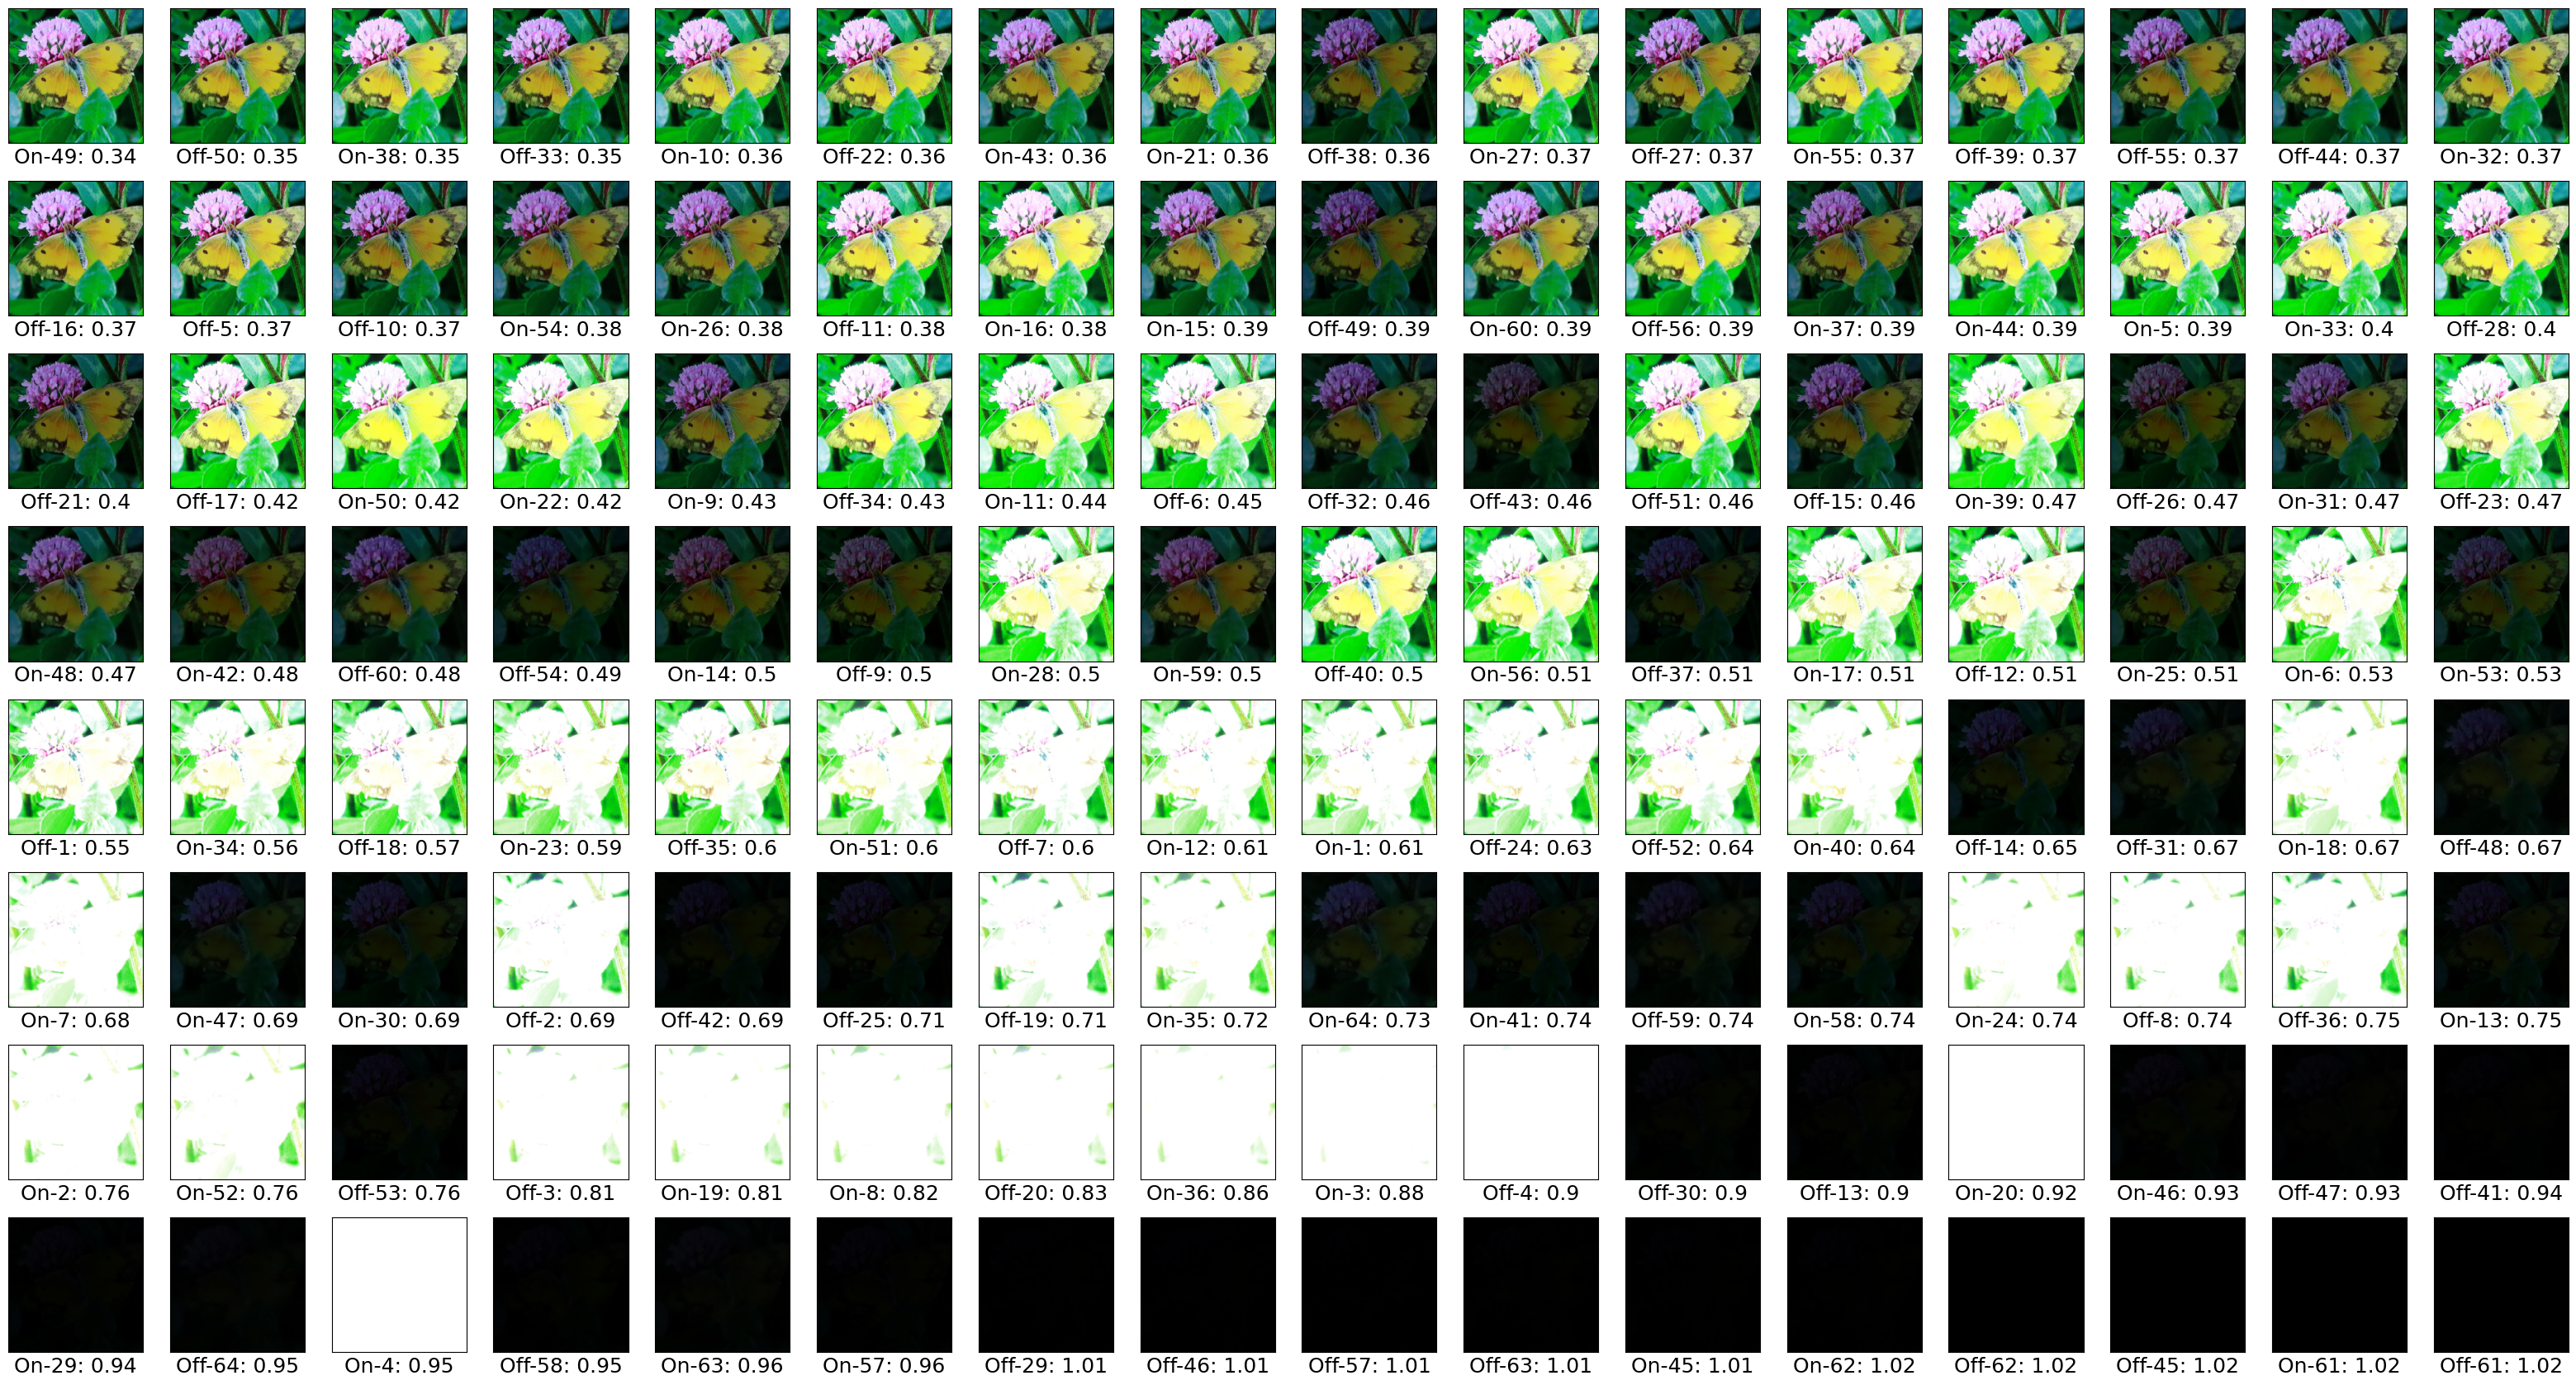

In [63]:
plt.figure(figsize=(40,24))

columns = 16

for i, item in enumerate(zip(images_sorted, param_options_sorted)):
    image, param = item
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype(os.path.join(materials_dir, 'Arial.ttf'), 30)
    param_key = 'On' if param[0] == 'l1' else 'Off'
    param_key += '-' + str(param[1])    
    plt.subplot(len(images_sorted) // columns + 1, columns, i + 1)    
    plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
    plt.xlabel(f'{param_key}: {round(sorted_LPIPS[i],2)}', labelpad=4, fontsize=18)
    plt.imshow(image)
    
plt.savefig(os.path.join(materials_dir, 'LPIPS.png'),bbox_inches='tight')